This file is created to implement the raw Linear Regression model that I created and compare the results with the sklearn implementation of Linear Regression.
I will try my code out on the regression problem of predicting the probability that a student will get an admission in graduate program. 
Lets get Started!!


** The questions I will be answering for myself are as follows: **
* How to handle categorical/nominal/ordinal values in regression problems?
* When do we need to standardize and normalize the data?
* How to know that we are gonna need to add regularization in our model? (I haven't coded regularization part in my code)


In [1]:
import pandas as pd
import numpy as np
import sys
import os
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Here we import the code I wrote from scatch
import Linear_Regression as lr

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
display(df.head())
display(df.sample())
#display(df.info)
display(df.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
272,273,294,95,1,1.5,1.5,7.64,0,0.49


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Data Visualization

We are first gonna plot the GRE score range and TOEFL score range, and it seems like people generally score more than 295 with a majority of people scoring between 310 and 325. The data does not seem to have any outliers in these two categories.

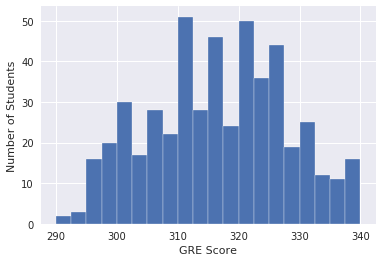

In [8]:
sns.set()
_ = plt.hist(df['GRE Score'], bins = 20, edgecolor = 'white')
_ = plt.xlabel('GRE Score')
_ = plt.ylabel("Number of Students")
plt.show()

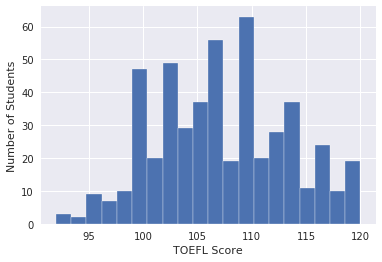

In [9]:
_ = plt.hist(df['TOEFL Score'], bins = 20, edgecolor = 'white')
_ = plt.xlabel('TOEFL Score')
_ = plt.ylabel("Number of Students")
plt.show()

Well, lets try to find out if there are any outliers in SOP, LOR, and CGPA columns of the given dataframe. We will use a box plot for this purpose. This will also help us get a feel of the range of variance in these three columns of the dataframe.
** It seems like there are no outliers in this dataset.**

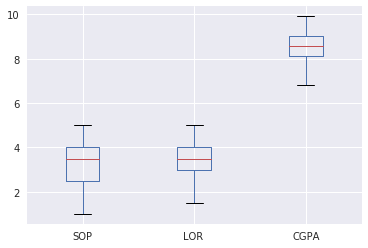

In [27]:
df.loc[:, ['SOP', 'LOR ', 'CGPA']].boxplot()


Next up, we want to see if any of the variables are highly correlated with each other, and which variables are most correlated with the objective feature - Chance of Admit. For this, we will plot the heatmap of the data and draw inference from that.

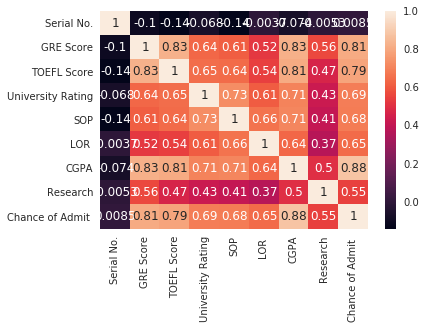

In [20]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

In [31]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

The heatmap above helps us draw a few simple intuitions about the data. 
* Chance of Admit is very highly correlated to CGPA, and shows quite a bit of correlation with GRE and TOEFL scores. This seems justified
* The odd fish among these features is the 'Research' feature. It seems like research has the least amount of correlation with Chance of Admit, and also has really bad correlation (comparatively) to other features like LOR, and CGPA. This is odd, but reasonable. People focussed on research generally are outliers that like to work independently (hence low LOR ratings), and don't like to focus too much on the "frivilous" activities like (CGPA, and SOP)

### Data Preparation
Here we will do the following:
* Answer the first two questions asked at the start of this notebook.
* Extract the target variable and split the data into training and test sets.

##### Q1. How to handle categorical and nominal/ordinal data in case of linear regression problems

Ans: For categorical data, use one hot vector encoding to turn the data into numerical form (if it isn't in that form). You don't have to do anything for Nominal and Ordinal data, the LR model inherently detects patterns of ordinality implicitly, and no additional effort needs to be directed at that problem.

##### Q2. When do we need to standardize/normalize the data?

Ans: Well, sklearn.linear_model has parameters "fit_intercept" and "normalize" for centering the data, and normalizing it, respectively. We can use a scaler of our choice form sklearn.preprocessing library. I have used standard_scaler and min_max_scaler before, and I will probably have to use one of them for my own code, because I haven't included normalization in my code.

In [4]:
df_train_y = df.loc[:449, ['Chance of Admit ']]
df_X = df.copy()
df_X = df_X.drop(['Chance of Admit '], axis = 1)
df_train_X = df_X.iloc[:-50, :]
df_test_y = df.loc[450:, ['Chance of Admit ']]
df_test_X = df_X.iloc[-50:, :]
df_train = df.loc[:449, :]

display(df_train_X.describe())
display(df_test_X.describe())
display(df_train_y.describe())
display(df_test_y.describe())
display(df_train.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,225.500000,316.726667,107.348889,3.080000,3.373333,3.477778,8.585178,0.555556
std,130.048068,11.304982,6.070159,1.151275,1.004201,0.915443,0.605303,0.497457
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,113.250000,309.000000,103.000000,2.000000,2.500000,3.000000,8.132500,0.000000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000
75%,337.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.060000,1.000000
max,450.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,475.50000,314.180000,105.780000,3.420000,3.380000,3.540000,8.497800,0.600000
std,14.57738,11.054023,6.065257,1.031939,0.872248,1.019404,0.600684,0.494872
min,451.00000,295.000000,95.000000,1.000000,1.500000,1.500000,7.210000,0.000000
25%,463.25000,304.250000,101.250000,3.000000,2.625000,2.625000,8.030000,0.000000
50%,475.50000,315.000000,105.000000,4.000000,3.500000,3.500000,8.465000,1.000000
75%,487.75000,323.000000,110.000000,4.000000,4.000000,4.500000,8.940000,1.000000
max,500.00000,337.000000,120.000000,5.000000,5.000000,5.000000,9.870000,1.000000


,Chance of Admit
count,450.000000
mean,0.722311
std,0.142438
min,0.340000
25%,0.630000
50%,0.725000
75%,0.827500
max,0.970000


,Chance of Admit
count,50.000000
mean,0.716600
std,0.130096
min,0.370000
25%,0.642500
50%,0.710000
75%,0.807500
max,0.960000


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,225.500000,316.726667,107.348889,3.080000,3.373333,3.477778,8.585178,0.555556,0.722311
std,130.048068,11.304982,6.070159,1.151275,1.004201,0.915443,0.605303,0.497457,0.142438
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,113.250000,309.000000,103.000000,2.000000,2.500000,3.000000,8.132500,0.000000,0.630000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000,0.725000
75%,337.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.060000,1.000000,0.827500
max,450.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Model Preparation and Training
Here we are gonna do the following things:
1. We are gonna train the sklearn.linear_model.LinearRegression model, with (& without) fit_intercept set to true, and normalize set to True.
2. We are gonna train the dataset on our own Linear Regression model, with (& without) using standard scaler on the data before hand.


##### 1. Using the Linear Regression model of the sklearn library

In [41]:
sk_model = sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = True).fit(df_train_X, df_train_y)
predicted_values = sk_model.predict(df_test_X)
error_metric = sklearn.metrics.mean_squared_error(df_test_y, predicted_values)



In [46]:
predicted_df = pd.DataFrame(predicted_values, columns = ['Chance of Admit '])
predicted_df.index = df_test_y.index


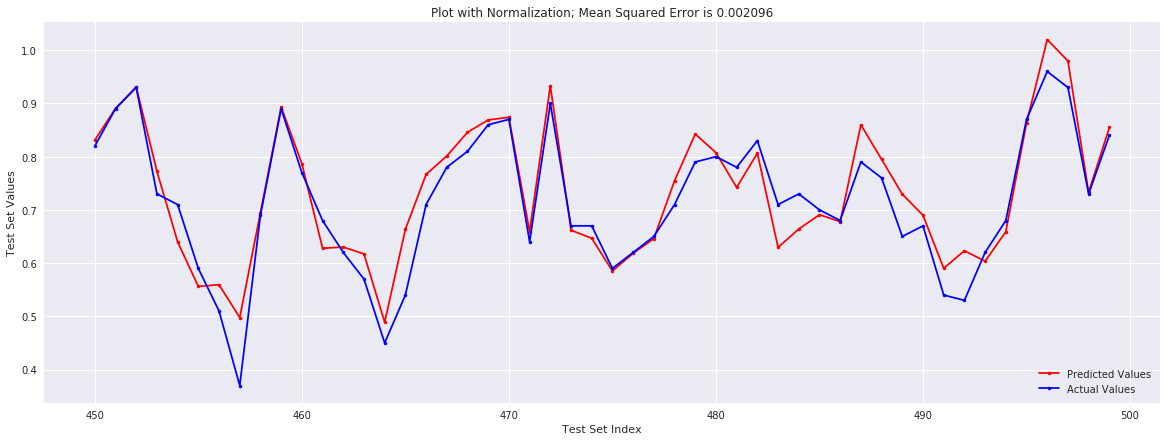

In [61]:
plt.figure(figsize = (20,7))
plt.plot(predicted_df['Chance of Admit '], color = 'red', marker = '.', label = "Predicted Values")
plt.plot(df_test_y['Chance of Admit '], color = 'blue', marker = '.', label = "Actual Values")
plt.title("Plot with Normalization; Mean Squared Error is {error:f}".format(error = error_metric))
plt.xlabel("Test Set Index")
plt.ylabel("Test Set Values")
plt.legend(loc = 'lower right')
plt.show()

In [62]:
sk_model_2 = sklearn.linear_model.LinearRegression().fit(df_train_X, df_train_y)
predicted_values_2 = sk_model_2.predict(df_test_X)
error_metric_2 = sklearn.metrics.mean_squared_error(df_test_y, predicted_values_2)


In [63]:
predicted_df_2 = pd.DataFrame(predicted_values_2, columns = ['Chance of Admit '])
predicted_df_2.index = df_test_y.index

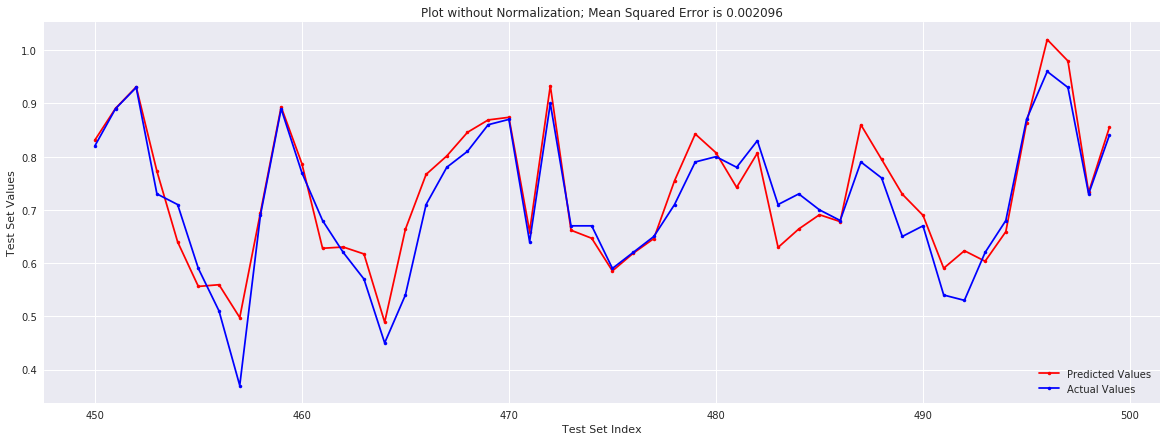

In [64]:
plt.figure(figsize = (20,7))
plt.plot(predicted_df_2['Chance of Admit '], color = 'red', marker = '.', label = "Predicted Values")
plt.plot(df_test_y['Chance of Admit '], color = 'blue', marker = '.', label = "Actual Values")
plt.title("Plot without Normalization; Mean Squared Error is {error:f}".format(error = error_metric_2))
plt.xlabel("Test Set Index")
plt.ylabel("Test Set Values")
plt.legend(loc = 'lower right')
plt.show()

##### Using My own code for Linear Regression

In [5]:
# Here we import the code I wrote from scatch
import Linear_Regression as lr

In [10]:
model_lr_1 = lr.LinearRegressionClass(df_train)
model_lr_1.fit()
#print(type(model_lr_1))
#print(model_lr_1)
predicted_values = model_lr_1.predict(df_test_X)

print(predicted_values)


<class 'Linear_Regression.LinearRegressionClass'>
[-3.48244297e+96 -3.50756636e+96 -3.53588123e+96 -3.47414695e+96
 -3.43728240e+96 -3.41163229e+96 -3.38297047e+96 -3.36556078e+96
 -3.45417681e+96 -3.56266716e+96 -3.50453611e+96 -3.41538315e+96
 -3.45351929e+96 -3.44601905e+96 -3.40390789e+96 -3.44058564e+96
 -3.49334558e+96 -3.52007162e+96 -3.56313940e+96 -3.58817002e+96
 -3.55626400e+96 -3.50433407e+96 -3.60799089e+96 -3.53478687e+96
 -3.50457394e+96 -3.46279336e+96 -3.49104309e+96 -3.52101763e+96
 -3.56558825e+96 -3.61521722e+96 -3.58627318e+96 -3.60799578e+96
 -3.64620861e+96 -3.51659161e+96 -3.58858143e+96 -3.55492333e+96
 -3.59940021e+96 -3.66398138e+96 -3.63837814e+96 -3.54151210e+96
 -3.56130762e+96 -3.50653443e+96 -3.51858028e+96 -3.52211139e+96
 -3.53751727e+96 -3.70768155e+96 -3.75094924e+96 -3.72557163e+96
 -3.61340226e+96 -3.70694271e+96]


In [12]:
error_metric_3 = sklearn.metrics.mean_squared_error(df_test_y, predicted_values)
print(error_metric_3)

1.2525200796268174e+193


Woah!! That's a really bad value... A really really bad score. I have to do the following:
1. Go through the code and try to detect if there is anything wrong.
2. If I can't detect anything this way, then create a very simple linear regression problem (of 1 parameter) and try to predict that. Try to understand using this example, what's going wrong.

### Evaluating the results